In [1]:
%matplotlib notebook

from IPython.display import Image
from simplify.face_lattice import FaceLattice
from simplify.face_lattice import show_face_lattice
from simplify.plot import plot_3d_sets
from islpy import BasicSet
import networkx as nx
import graphviz as gv

# Face Lattice

TODO - describe the face lattice generally without an example.

## Simple tetrahedron example

Now let's look at a simple 3D tetrahedron in the first octant described by the following set. We can describe it parametrically in $N$ (i.e., as a 4D set in the 3+1 index and parameter space). The plot below shows the 3D projection at a fixed value of $N=12$.

<IPython.core.display.Javascript object>


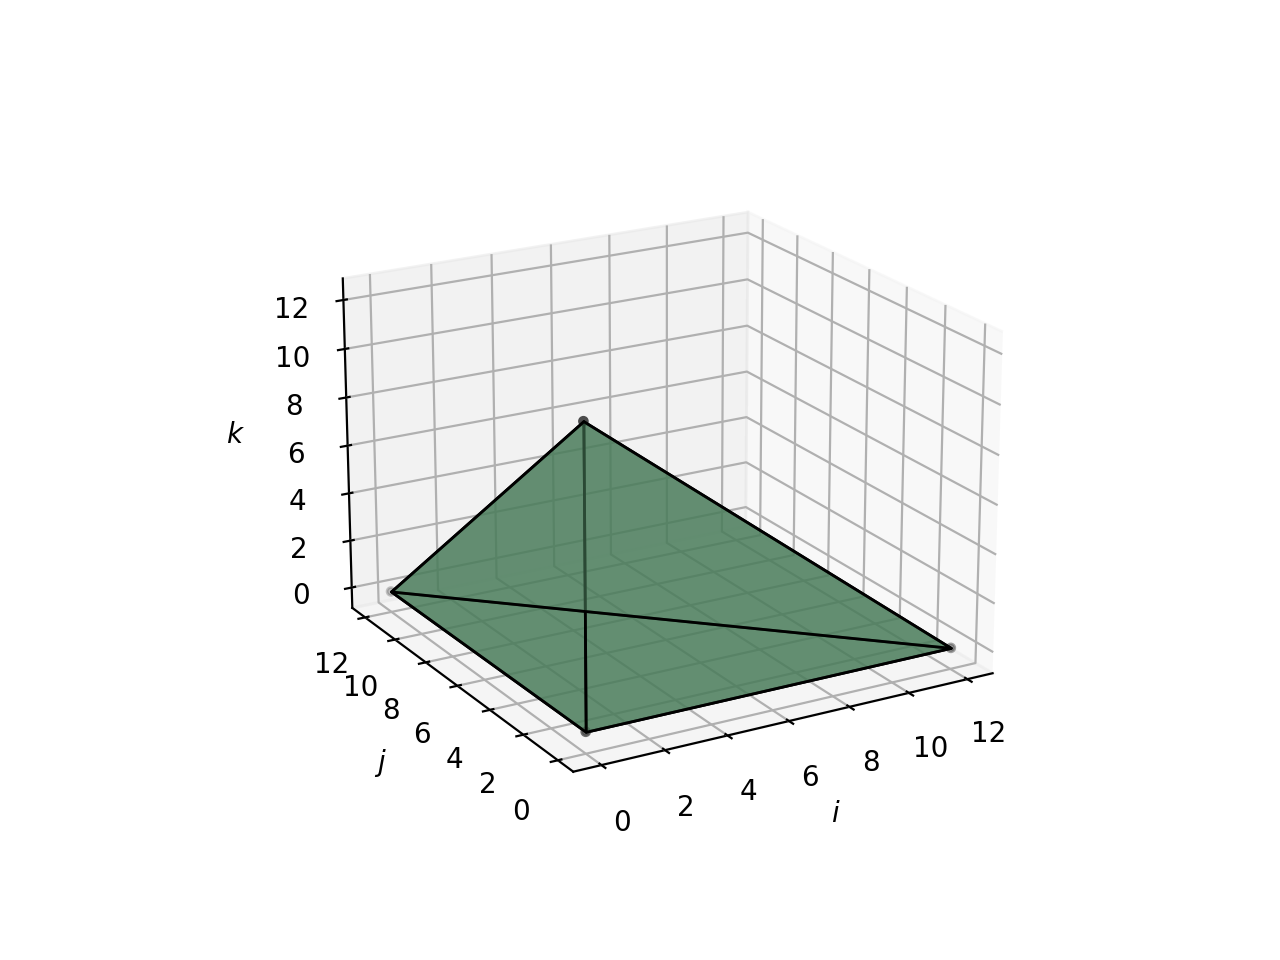

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [2]:
domain = BasicSet('[N]->{[i,j,k] : N=12 and 0<=i,j,k and i+j+k<=N }')
plot_3d_sets([domain])

Notice that there are **four** 2D faces in the plot above, which corresponds to the fact that this polyhedral set can be described by **four** constraints (excluding constraints involving only parameters):

In [3]:
for constraint in domain.get_constraints():
    print(constraint)

[N] -> { [i, j, k] : -12 + N = 0 }
[N] -> { [i, j, k] : i >= 0 }
[N] -> { [i, j, k] : j >= 0 }
[N] -> { [i, j, k] : k >= 0 }
[N] -> { [i, j, k] : 12 - i - j - k >= 0 }


Each face can be described by changing one the inequalities to an equality (i.e., by saturating) one of these constraints. The bottom face (the triangle in the ij-plane) can be described by saturating the $k \ge 0$ constraint:

<IPython.core.display.Javascript object>


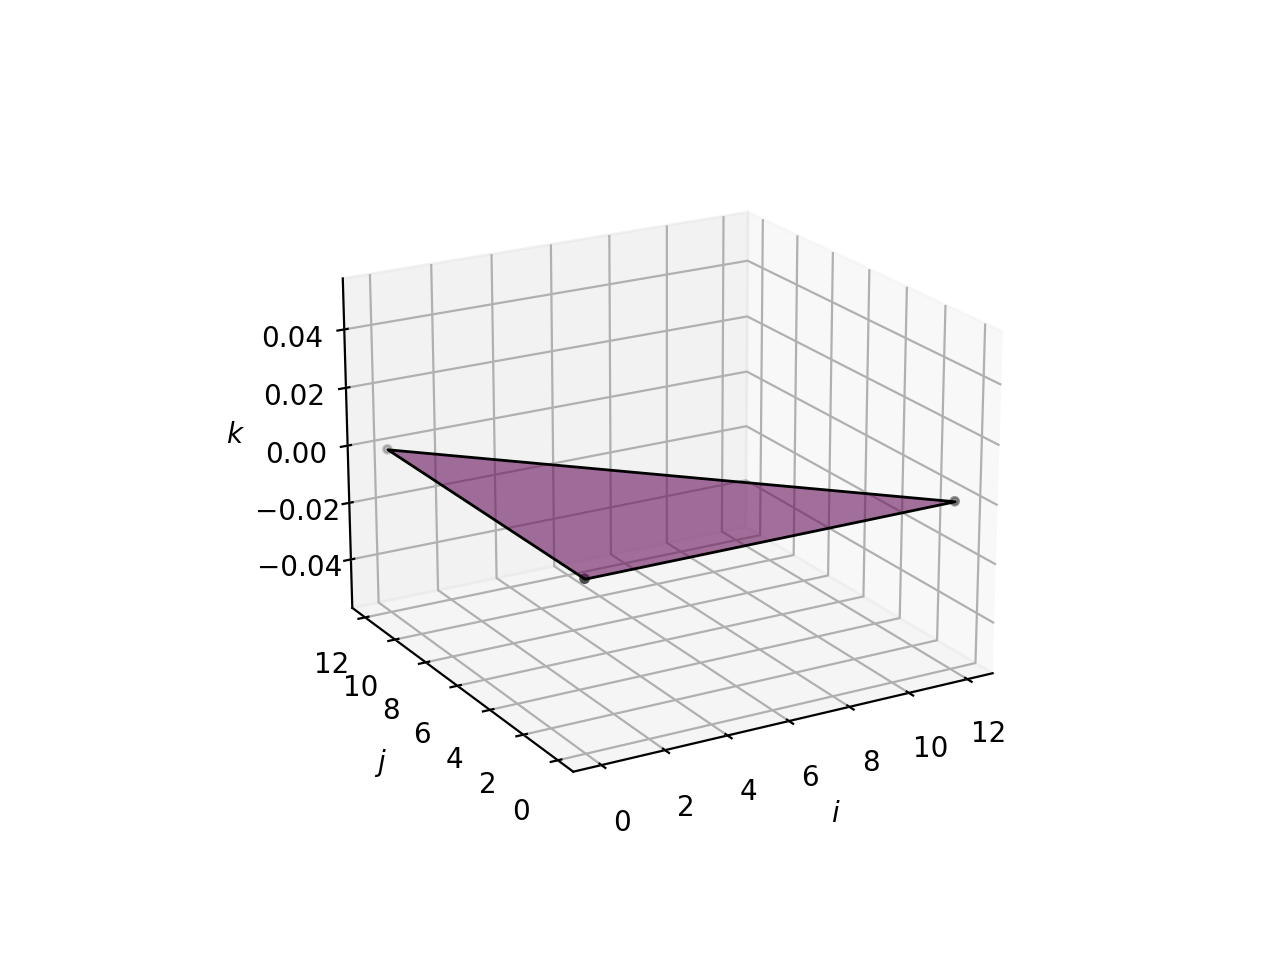

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [4]:
bottom_face = BasicSet('[N]->{[i,j,k] : N=12 and 0<=i,j,k and i+j+k<=N and k=0 }')
plot_3d_sets([bottom_face])

The top oblique face is described by saturating the $i+j+k \le N$ constraint:

<IPython.core.display.Javascript object>


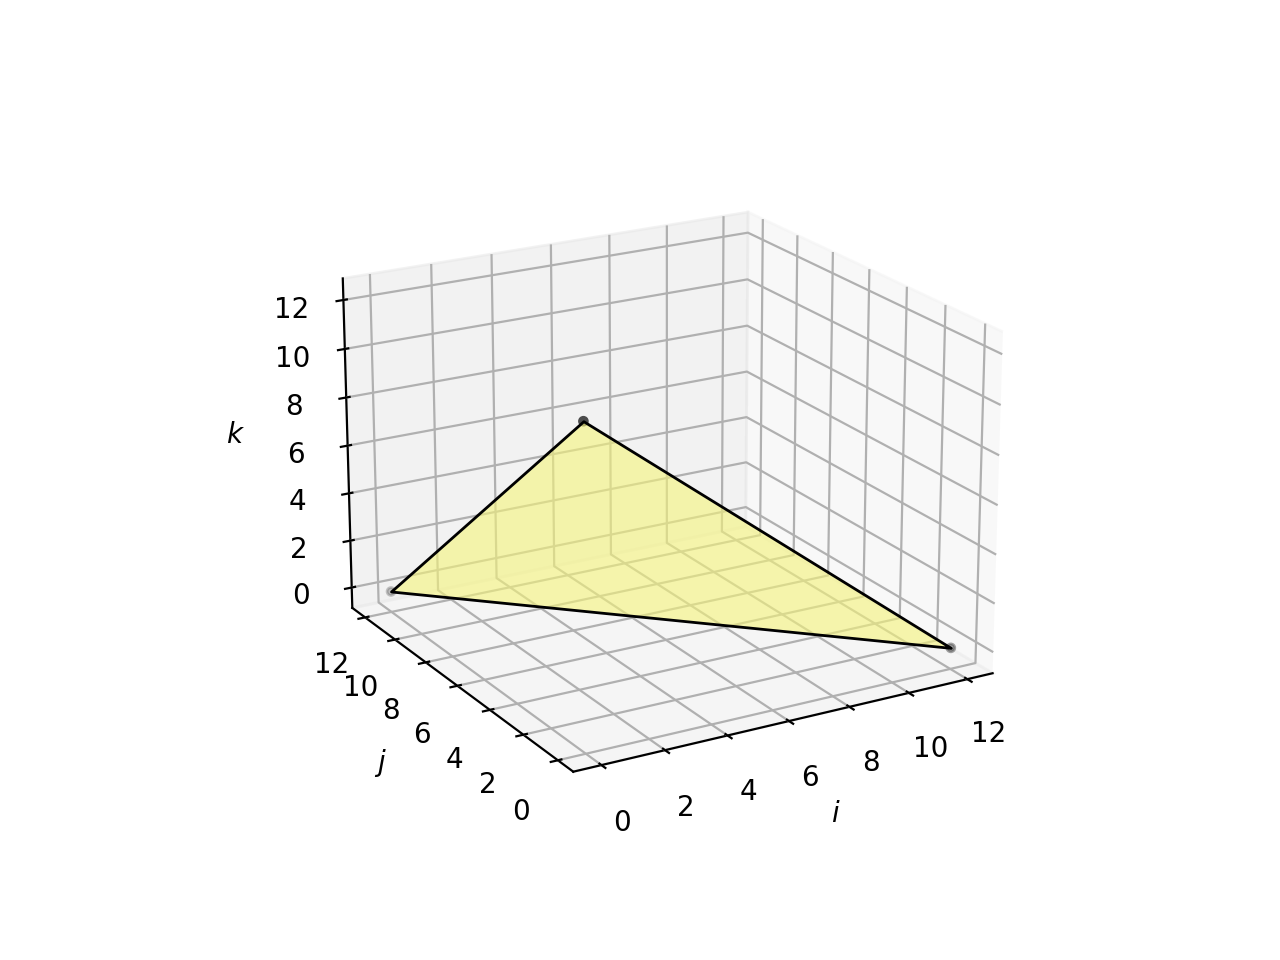

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [5]:
top_oblique_face = BasicSet('[N]->{[i,j,k] : N=12 and 0<=i,j,k and i+j+k=N }')
plot_3d_sets([top_oblique_face])

From each of these faces, we can describe the 1D edges by saturating one additional constraint. For example, from the top oblique face, the bottom edge in the ij-plane comes from saturating **both** the $k \ge 0$ and $i+j+k \le N$ constraints. Notice that this edge is just the intersection of the bottom face and the top oblique face.

<IPython.core.display.Javascript object>


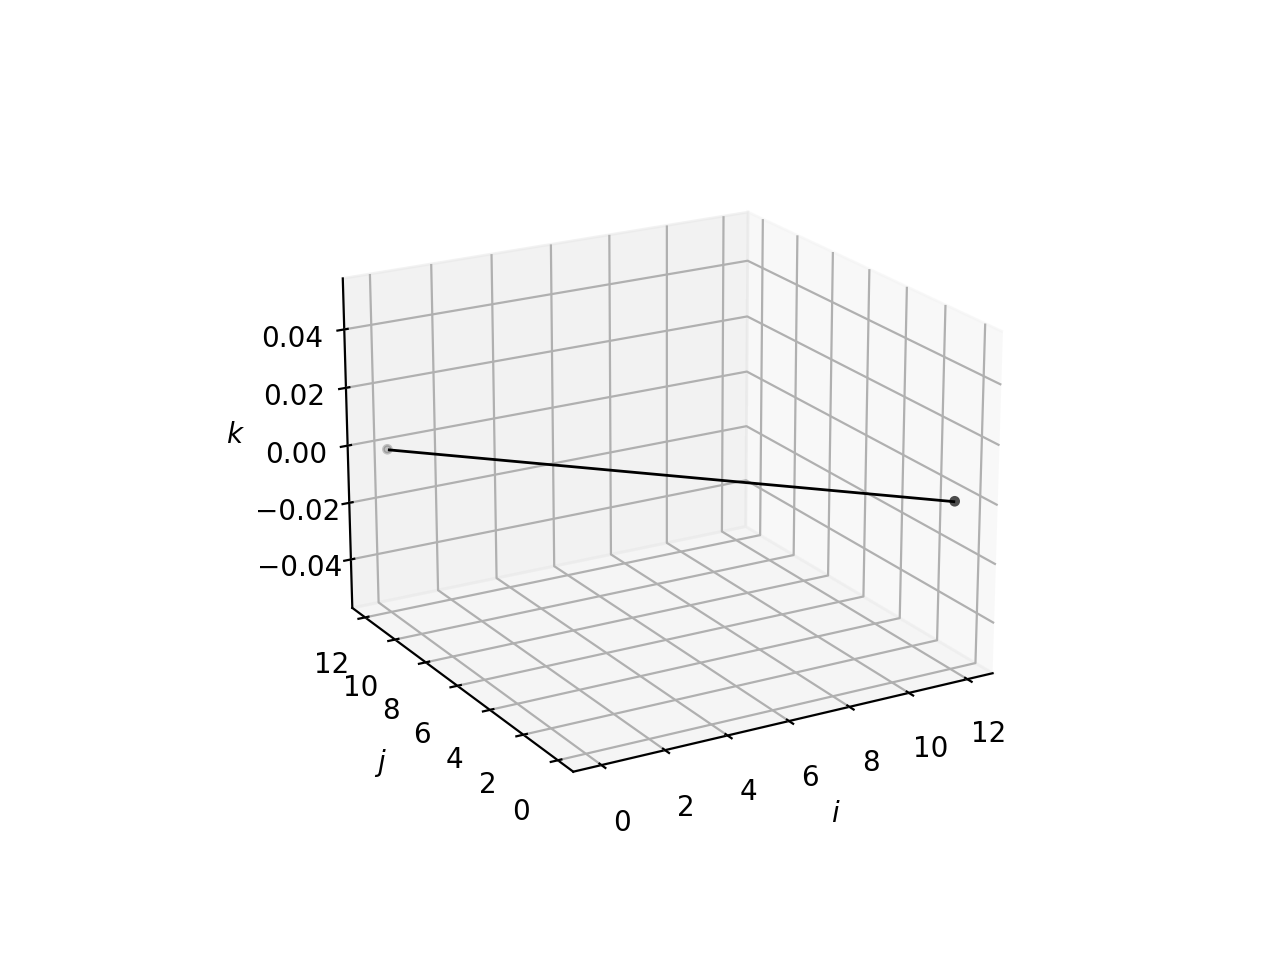

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [6]:
bottom_diagonal_edge = BasicSet('[N]->{[i,j,k] : N=12 and 0<=i,j,k and i+j+k=N and k=0 }')
plot_3d_sets([bottom_diagonal_edge])

The pattern continues down to the vertices (by saturating one additional constraint). Again, notice here that each vertex is just the intersection of **three** faces or **two** edges. Multiple pairs of edges, when intersected, describe the same vertex but these edges all belong to one of the same three faces.  To construct all possible combinations of saturated constraints, we start from the vertices (which we can compute with ISL), and iteratively unsaturate constraints one at a time. This is effectively the reverse of Loechner and Wilde's ScanFaces algorithm which starts at the "top" and iterative saturates constraints one at a time to obtain all the vertices. We don't use Loecher and Wilde's ScanFaces algorithm because to avoid dependencies on PolyLib.

The set of all possible k-faces for this tetrahedron is:

<IPython.core.display.Javascript object>


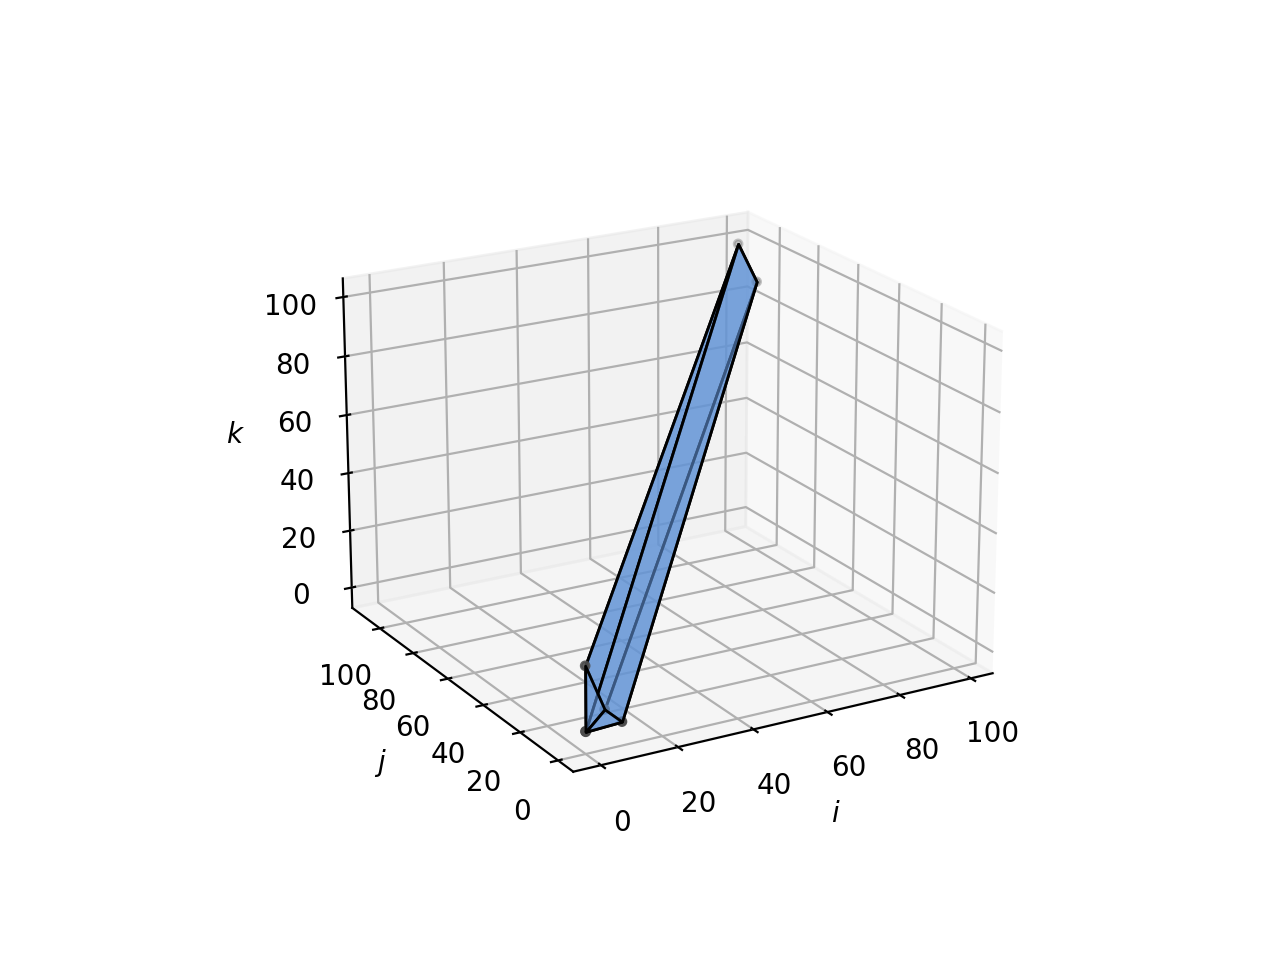

constraints:
c0	[[ -1   0   1  10]	{ [i, j, k] : 10 - i + k >= 0 }
c1	 [  0  -1   1  10]	{ [i, j, k] : 10 - j + k >= 0 }
c2	 [  0   0   1   0]	{ [i, j, k] : k >= 0 }
c3	 [  1  -1   1   0]	{ [i, j, k] : i - j + k >= 0 }
c4	 [  1   0  -1   0]	{ [i, j, k] : i - k >= 0 }
c5	 [ -1  10 -10  -1]]	{ [i, j, k] : -1 - i + 10j - 10k >= 0 }

chamber-0: { rat:  :  }
face-lattice:
3-faces: [{}]
2-faces: [{1}]
1-faces: [{1, 5}, {1, 4}, {1, 3}, {0, 1}]
0-faces: [{3, 4, 5}, {2, 3, 5}, {1, 4, 5}, {1, 3, 4}, {0, 2, 5}, {0, 1, 5}, {0, 1, 2, 3}]



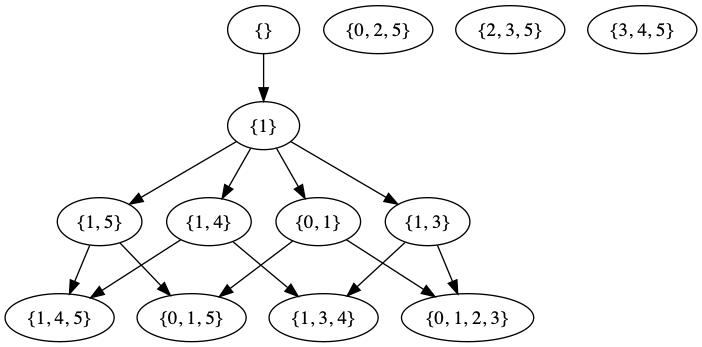

In [10]:
#lattice = FaceLattice('[N]->{[i,j,k] : 0<=i,j,k and i+j+k<=N }')
lattice = FaceLattice('{ [i, j, k] : k >= -10 + i and k >= -10 + j and k >= 0 and -i + j <= k <= i and 10k < -i + 10j }')
plot_3d_sets([lattice.bset])

print('constraints:')
lattice.pretty_print_constraints()

# there is really one face lattice per chamber, in these simple examples
# there is only one chamber
chamber = 0

print('chamber-{}: {}'.format(chamber, lattice.chambers[chamber].get_domain()))
lattice.pretty_print()
G = lattice.graph[chamber]
G = nx.relabel_nodes(G, lambda s: str(set(s)) if s else '{}', copy=False)
nx.drawing.nx_pydot.write_dot(G, '.lattice.dot')
gv.render('dot', 'png', '.lattice.dot')

Image(".lattice.dot.png")

Notice that this reports 4 vertices, 6 edges, and 4 faces, which matches the visual representation of the tetrahedron. Generally, the words ***face*** and ***edge*** only make sense in 3D, so instead we usually talk about k-faces where 0-faces correspond to vertices, 1-faces to ***edges***, and 2-faces to ***faces***, and so on.